<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.2pretrained_ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load korpus

In [3]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [4]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

load model pretrained

In [5]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import get_tmpfile

In [25]:
oslo1='/content/drive/MyDrive/Gensim Continuous Skipgram no lemma.bin'
oslo2='/content/drive/MyDrive/Global Vectors no lemma.txt'

In [7]:
w2vtweet='/content/drive/MyDrive/word2vec_twitter_tokens (1).bin'
glovetweet='/content/drive/MyDrive/glove.twitter.27B.100d.txt'

In [ ]:
premodel = KeyedVectors.load_word2vec_format(w2vtweet, binary=True,encoding='utf-8')
# model=gensim.models.word2vec.Word2Vec.load('')

In [26]:
premodel = KeyedVectors.load_word2vec_format(oslo1, binary=True)

In [59]:
tmp_file = get_tmpfile("test_word2vec.txt")
glove2word2vec(glovetweet, tmp_file)
premodel = KeyedVectors.load_word2vec_format(tmp_file)

In [60]:
premodel.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



(1193514, 100)

reduce dimensi

In [42]:
import sklearn.datasets
!pip install umap-learn[plot]
import plotly.express as px
from umap import UMAP

In [43]:
reduced = UMAP(n_components=100).fit_transform(premodel.wv.vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [44]:
premodel.wv.vectors=reduced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [45]:
premodel.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



(291186, 100)

pilih model

In [27]:
pakai_model=2

load model

In [10]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 12.8 MB/s 


In [61]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/dataisear(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model

In [62]:
if pakai_model == 1:
  print(premodel.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1193514, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [ ]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

ambil conntoh model wor embedding

In [63]:
import array
count=0
simpanang=[]
simpankat=[]
jml=24
if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

has_vec=ekstrak

In [ ]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(24, 101)

In [ ]:
result.to_excel("preptambah,glove.xlsx")

average base ekstraksi fitur

In [64]:
import array
ekstrak=[]
dim1=100
dim3=300
temp=array.array('i',(0,)*dim1)
hitungpre=0
hitungbiasa=0

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      try:
        temp=np.add(temp,premodel.wv[word])
        hitungpre+=1
      except:
        temp=np.add(temp,model.wv[word])
        hitungbiasa+=1
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      try:
        temp=np.add(temp,premodel.wv[word])
        hitungpre+=1
      except:
        temp=np.add(temp,model.word_vectors[model.dictionary[word]])
        hitungbiasa+=1
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [65]:
print(hitungpre)
print(hitungbiasa)
print(hitungpre+hitungbiasa)

164682
1095
165777


In [66]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [18]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [19]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

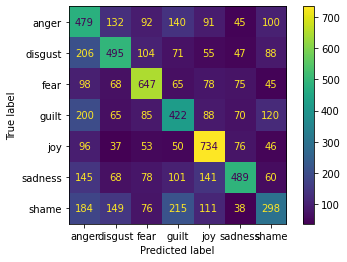

0.4741883980840873
(0.4766160769346411, 0.47340497366177353, 0.4706819368144987, None)


In [67]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

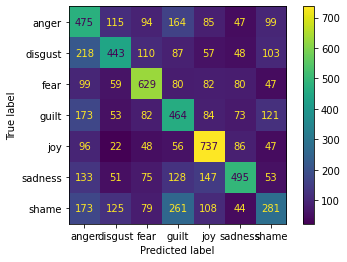

0.46886641830761044
(0.4718935839580313, 0.46814829863366725, 0.46520821867559226, None)


In [68]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

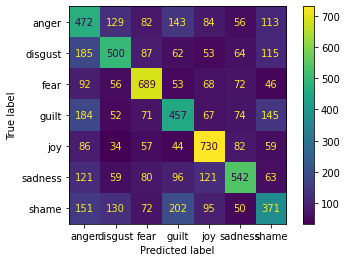

0.5003991484832357
(0.5009974919075382, 0.49969792962416554, 0.4986298141578324, None)


In [69]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)